# Panel Data from Finnish Meterological Institute

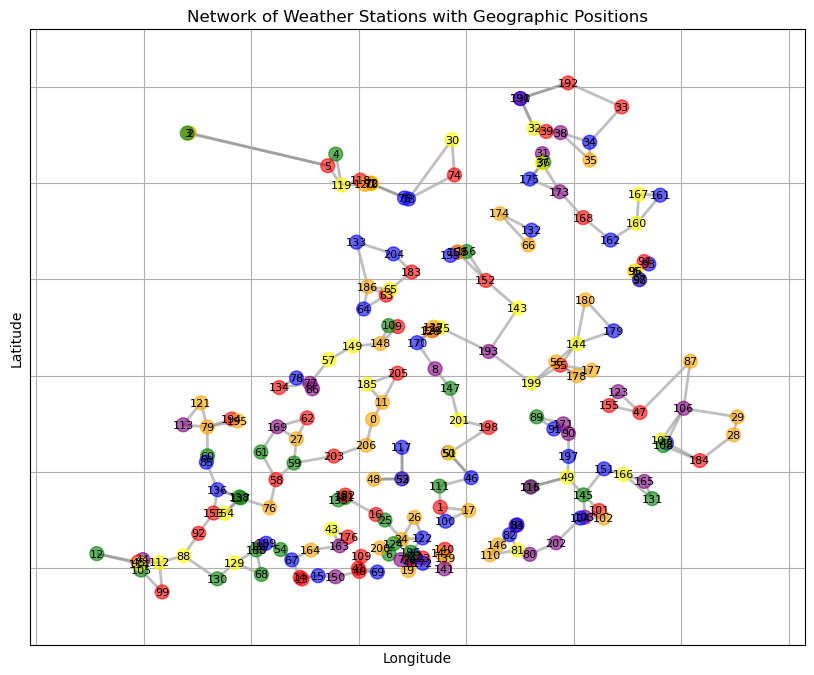

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
import random

# Step 1: Load data from CSV
# Specify the path to your CSV file
file_path = 'FMIData.csv'
data = pd.read_csv(file_path)

# Step 2: Create a network graph
G = nx.Graph()

# find unique station names 

fmi_stations = np.unique(data['name'])

# build up a network whose nodes represent FMI stations 

for iter_station in range(len(fmi_stations)): 
    # read in the current station name from the list of FMI stations
    current_name = fmi_stations[iter_station]
    # construct sub_df by selecting all rows with same station name
    sub_df = filtered_data = data[data['name'] == current_name]
    # random generate cluster index (this will be modified later) 
    cluster = random.choice([0,1,2,3,4,5])
    # add a node to the networkx graph G 
    G.add_node(iter_station,name=sub_df.iloc[0]['name'],cluster_idx=cluster,coords=[sub_df.iloc[0]['Latitude'],
              sub_df.iloc[0]['Longitude']],temp=sub_df.sort_values(by='Timestamp')['temp']) 

# Step 4: Use latitude and longitude for node positions in the plot
pos = {node: (G.nodes[node]['coords'][1], G.nodes[node]['coords'][0]) for node in G.nodes}

# Compute all-pair Euclidean distances between node samples
sample_matrix = np.vstack([G.nodes[i]['coords'] for i in G.nodes])
distances = cdist(sample_matrix, sample_matrix)

nrneighbours = 2

# Connect each node to the two closest other nodes
for i in G.nodes:
    distances[i, i] = np.inf  # Ignore self-distances by setting them to infinity
    closest_nodes = np.argsort(distances[i])[:nrneighbours]  # Get indices of two closest nodes
    for j in closest_nodes:
        G.add_edge(i, j)

# Define a color map based on node attribute values
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5: 'orange'}
node_colors = [color_map[data['cluster_idx']] for _, data in G.nodes(data=True)]


# Step 5: Visualize the graph
plt.figure(figsize=(10, 8))  # Set the size of the plot
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.6)
# Draw edges
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Network of Weather Stations with Geographic Positions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)  # Add a grid for easier readability of the plot
plt.show()



In [13]:
print(G.nodes[10]["temp"])

5342     -4.3
7591     -5.1
7252     -5.4
12359    -5.7
11849    -7.1
         ... 
18754   -20.0
13949   -20.4
8070    -20.9
9623    -21.3
6133    -21.7
Name: temp, Length: 96, dtype: float64
